### MOdel: VGG16

In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
import random
import numpy as np
import tensorflow as tf

# Set seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Constants
IMG_SIZE = 224
NUM_CLASSES = 20

# Load and filter data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
y_train = y_train.flatten()
y_test = y_test.flatten()
selected_classes = random.sample(range(100), NUM_CLASSES)
class_map = {orig: new for new, orig in enumerate(selected_classes)}
test_mask = np.isin(y_test, selected_classes)
x_test, y_test = x_test[test_mask], y_test[test_mask]
y_test = np.vectorize(class_map.get)(y_test)
x_test = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE)).numpy()
x_test_processed = preprocess_input(x_test)

# Test activations
activations = ["relu", "sigmoid", "tanh", "softmax", "linear"]
results = {}

for activation in activations:
    base_model = VGG16(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
    base_model.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation=activation)(x)
    output = Dense(NUM_CLASSES, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    y_pred_probs = model.predict(x_test_processed, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)
    acc = accuracy_score(y_test, y_pred)
    results[activation] = acc
    print(f"Activation: {activation:<10} -> Accuracy: {acc:.4f}")


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Activation: relu       -> Accuracy: 0.0480
Activation: sigmoid    -> Accuracy: 0.0520
Activation: tanh       -> Accuracy: 0.0695
Activation: softmax    -> Accuracy: 0.0695
Activation: linear     -> Accuracy: 0.0270


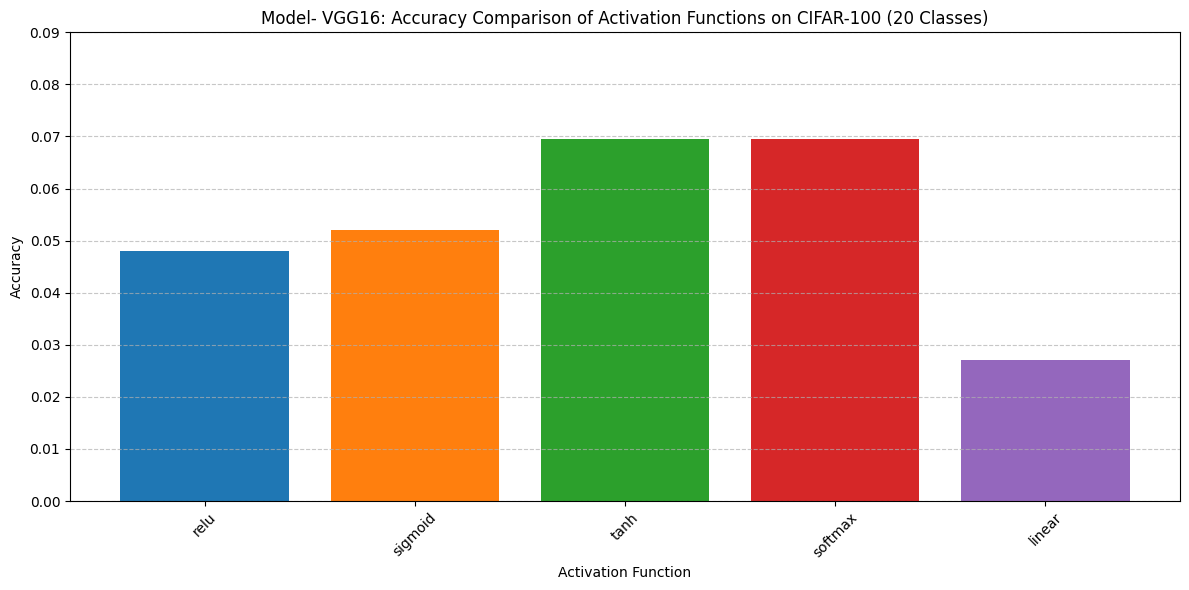

In [7]:
import matplotlib.pyplot as plt

# Accuracy results
activation_accuracies = {
    "relu": 0.0480,
    "sigmoid": 0.0520,
    "tanh": 0.0695,
    "softmax": 0.0695,
    "linear": 0.0270
}

# Data for plotting
activations = list(activation_accuracies.keys())
accuracies = list(activation_accuracies.values())
colors = plt.cm.tab10(range(len(activations)))  # Unique color for each bar

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(activations, accuracies, color=colors)
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.title('Model- VGG16: Accuracy Comparison of Activation Functions on CIFAR-100 (20 Classes)')
plt.xticks(rotation=45)
plt.ylim(0, 0.09)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Model : VGG19

In [14]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
import random
import numpy as np
import tensorflow as tf

# Set seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Constants
IMG_SIZE = 224
NUM_CLASSES = 20

# Load and filter data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
y_train = y_train.flatten()
y_test = y_test.flatten()
selected_classes = random.sample(range(100), NUM_CLASSES)
class_map = {orig: new for new, orig in enumerate(selected_classes)}
test_mask = np.isin(y_test, selected_classes)
x_test, y_test = x_test[test_mask], y_test[test_mask]
y_test = np.vectorize(class_map.get)(y_test)
x_test = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE)).numpy()
x_test_processed = preprocess_input(x_test)

# Test activations
activations = ["relu", "sigmoid", "tanh", "softmax", "linear"]
results = {}

for activation in activations:
    base_model = VGG19(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
    base_model.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation=activation)(x)
    output = Dense(NUM_CLASSES, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    y_pred_probs = model.predict(x_test_processed, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)
    acc = accuracy_score(y_test, y_pred)
    results[activation] = acc
    print(f"Activation: {activation:<10} -> Accuracy: {acc:.4f}")


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Activation: relu       -> Accuracy: 0.0405
Activation: sigmoid    -> Accuracy: 0.0675
Activation: tanh       -> Accuracy: 0.0565
Activation: softmax    -> Accuracy: 0.0760
Activation: linear     -> Accuracy: 0.0445


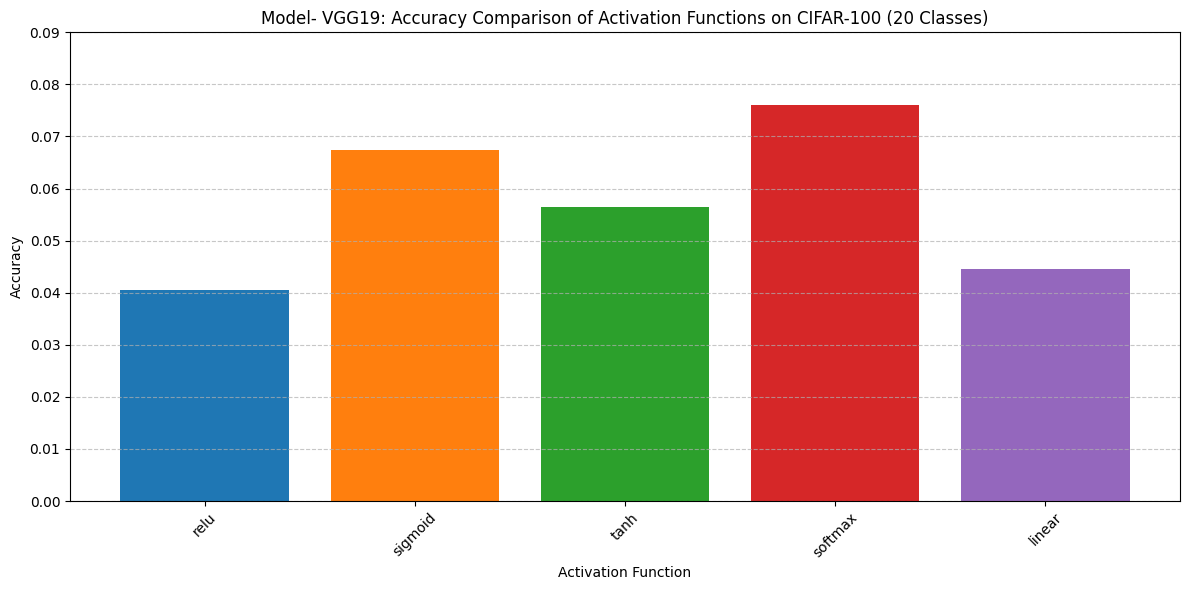

In [2]:
import matplotlib.pyplot as plt

# Accuracy results
activation_accuracies = {
    "relu": 0.0405,
    "sigmoid": 0.0675,
    "tanh": 0.0565,
    "softmax": 0.0760,
    "linear": 0.0445
}

# Data for plotting
activations = list(activation_accuracies.keys())
accuracies = list(activation_accuracies.values())
colors = plt.cm.tab10(range(len(activations)))  # Unique color for each bar

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(activations, accuracies, color=colors)
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.title('Model- VGG19: Accuracy Comparison of Activation Functions on CIFAR-100 (20 Classes)')
plt.xticks(rotation=45)
plt.ylim(0, 0.09)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### model : MobileNetV2

In [1]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
import random
import numpy as np
import tensorflow as tf



# Set seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Constants
IMG_SIZE = 224
NUM_CLASSES = 20

# Load and filter data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
y_train = y_train.flatten()
y_test = y_test.flatten()
selected_classes = random.sample(range(100), NUM_CLASSES)
class_map = {orig: new for new, orig in enumerate(selected_classes)}
test_mask = np.isin(y_test, selected_classes)
x_test, y_test = x_test[test_mask], y_test[test_mask]
y_test = np.vectorize(class_map.get)(y_test)
x_test = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE)).numpy()
x_test_processed = preprocess_input(x_test)

# Test activations
activations = ["relu", "sigmoid", "tanh", "softmax", "linear"]
results = {}

for activation in activations:
    base_model = MobileNetV2(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
    base_model.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation=activation)(x)
    output = Dense(NUM_CLASSES, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    y_pred_probs = model.predict(x_test_processed, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)
    acc = accuracy_score(y_test, y_pred)
    results[activation] = acc
    print(f"Activation: {activation:<10} -> Accuracy: {acc:.4f}")


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Activation: relu       -> Accuracy: 0.0220
Activation: sigmoid    -> Accuracy: 0.0490
Activation: tanh       -> Accuracy: 0.0520
Activation: softmax    -> Accuracy: 0.0525
Activation: linear     -> Accuracy: 0.0695


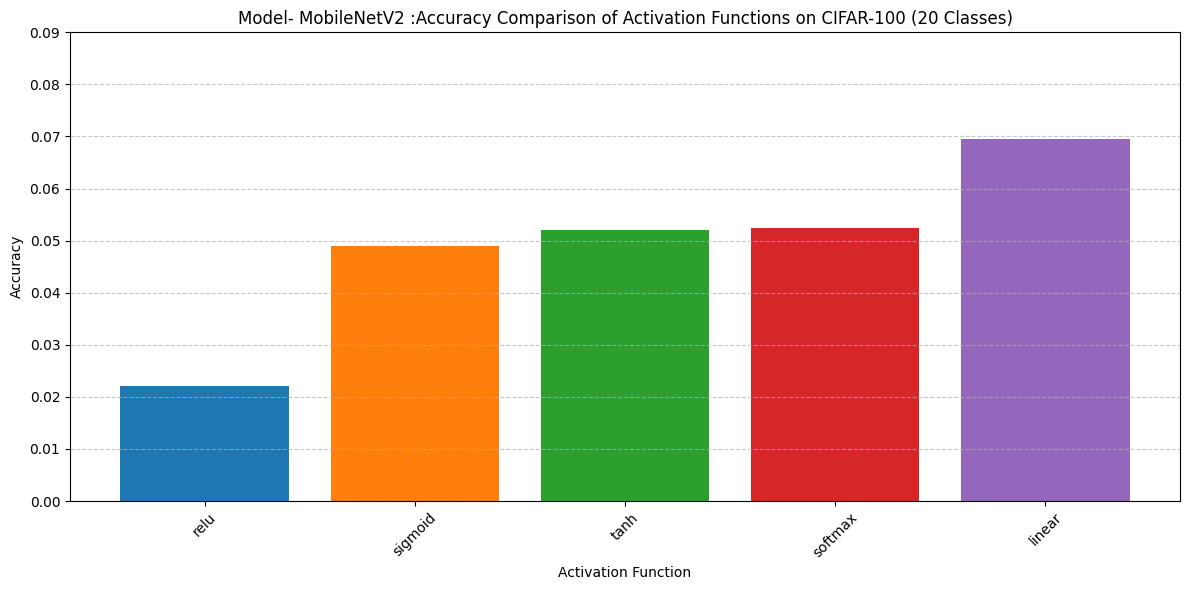

In [12]:
import matplotlib.pyplot as plt

# Accuracy results
activation_accuracies = {
    "relu": 0.0220,
    "sigmoid": 0.0490,
    "tanh": 0.0520,
    "softmax": 0.0525,
    "linear": 0.0695
}

# Data for plotting
activations = list(activation_accuracies.keys())
accuracies = list(activation_accuracies.values())
colors = plt.cm.tab10(range(len(activations)))  # Unique color for each bar

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(activations, accuracies, color=colors)
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.title('Model- MobileNetV2 :Accuracy Comparison of Activation Functions on CIFAR-100 (20 Classes)')
plt.xticks(rotation=45)
plt.ylim(0, 0.09)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Model : ResNet50

In [6]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
import random
import numpy as np
import tensorflow as tf

# Set seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Constants
IMG_SIZE = 224
NUM_CLASSES = 20

# Load and filter data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
y_train = y_train.flatten()
y_test = y_test.flatten()
selected_classes = random.sample(range(100), NUM_CLASSES)
class_map = {orig: new for new, orig in enumerate(selected_classes)}
test_mask = np.isin(y_test, selected_classes)
x_test, y_test = x_test[test_mask], y_test[test_mask]
y_test = np.vectorize(class_map.get)(y_test)
x_test = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE)).numpy()
x_test_processed = preprocess_input(x_test)

# Test activations
activations = ["relu", "sigmoid", "tanh", "softmax", "linear"]
results = {}

for activation in activations:
    base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
    base_model.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation=activation)(x)
    output = Dense(NUM_CLASSES, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    y_pred_probs = model.predict(x_test_processed, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)
    acc = accuracy_score(y_test, y_pred)
    results[activation] = acc
    print(f"Activation: {activation:<10} -> Accuracy: {acc:.4f}")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Activation: relu       -> Accuracy: 0.0785
Activation: sigmoid    -> Accuracy: 0.0430
Activation: tanh       -> Accuracy: 0.0415
Activation: softmax    -> Accuracy: 0.0560
Activation: linear     -> Accuracy: 0.0650


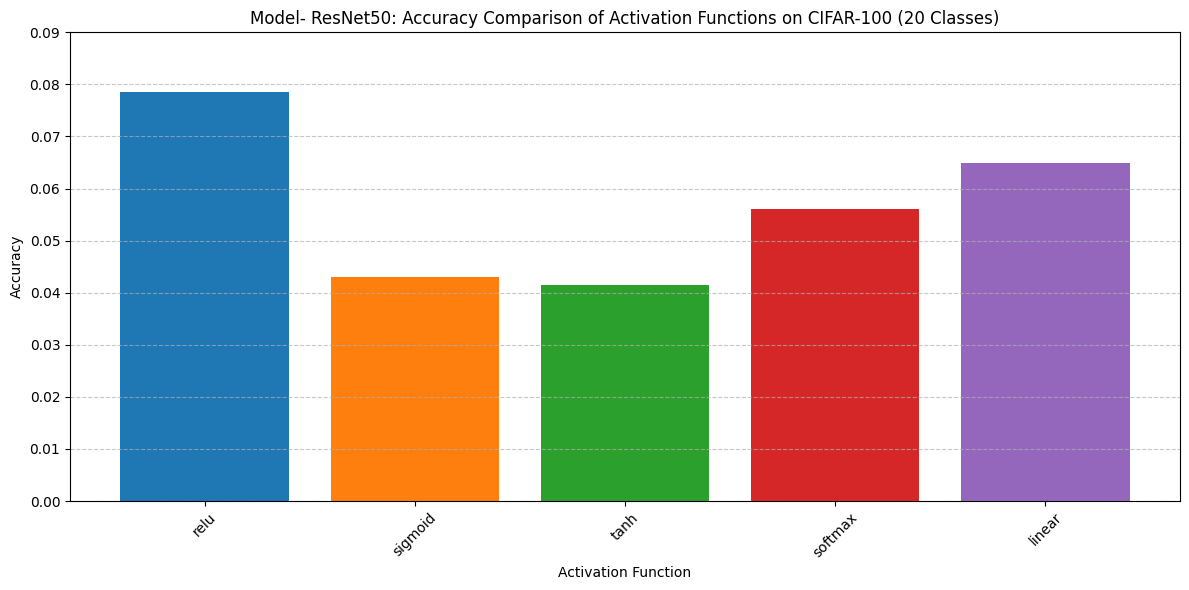

In [9]:
import matplotlib.pyplot as plt

# Accuracy results
activation_accuracies = {
    "relu": 0.0785,
    "sigmoid": 0.0430,
    "tanh": 0.0415,
    "softmax": 0.0560,
    "linear": 0.0650
}

# Data for plotting
activations = list(activation_accuracies.keys())
accuracies = list(activation_accuracies.values())
colors = plt.cm.tab10(range(len(activations)))  # Unique color for each bar

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(activations, accuracies, color=colors)
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.title('Model- ResNet50: Accuracy Comparison of Activation Functions on CIFAR-100 (20 Classes)')
plt.xticks(rotation=45)
plt.ylim(0, 0.09)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Model : DenseNet121

In [10]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
import random
import numpy as np
import tensorflow as tf

# Set seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Constants
IMG_SIZE = 224
NUM_CLASSES = 20

# Load and filter data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
y_train = y_train.flatten()
y_test = y_test.flatten()
selected_classes = random.sample(range(100), NUM_CLASSES)
class_map = {orig: new for new, orig in enumerate(selected_classes)}
test_mask = np.isin(y_test, selected_classes)
x_test, y_test = x_test[test_mask], y_test[test_mask]
y_test = np.vectorize(class_map.get)(y_test)
x_test = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE)).numpy()
x_test_processed = preprocess_input(x_test)

# Test activations
activations = ["relu", "sigmoid", "tanh", "softmax", "linear"]
results = {}

for activation in activations:
    base_model = DenseNet121(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
    base_model.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation=activation)(x)
    output = Dense(NUM_CLASSES, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    y_pred_probs = model.predict(x_test_processed, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)
    acc = accuracy_score(y_test, y_pred)
    results[activation] = acc
    print(f"Activation: {activation:<10} -> Accuracy: {acc:.4f}")


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Activation: relu       -> Accuracy: 0.0500
Activation: sigmoid    -> Accuracy: 0.0630
Activation: tanh       -> Accuracy: 0.0620
Activation: softmax    -> Accuracy: 0.0560
Activation: linear     -> Accuracy: 0.0650


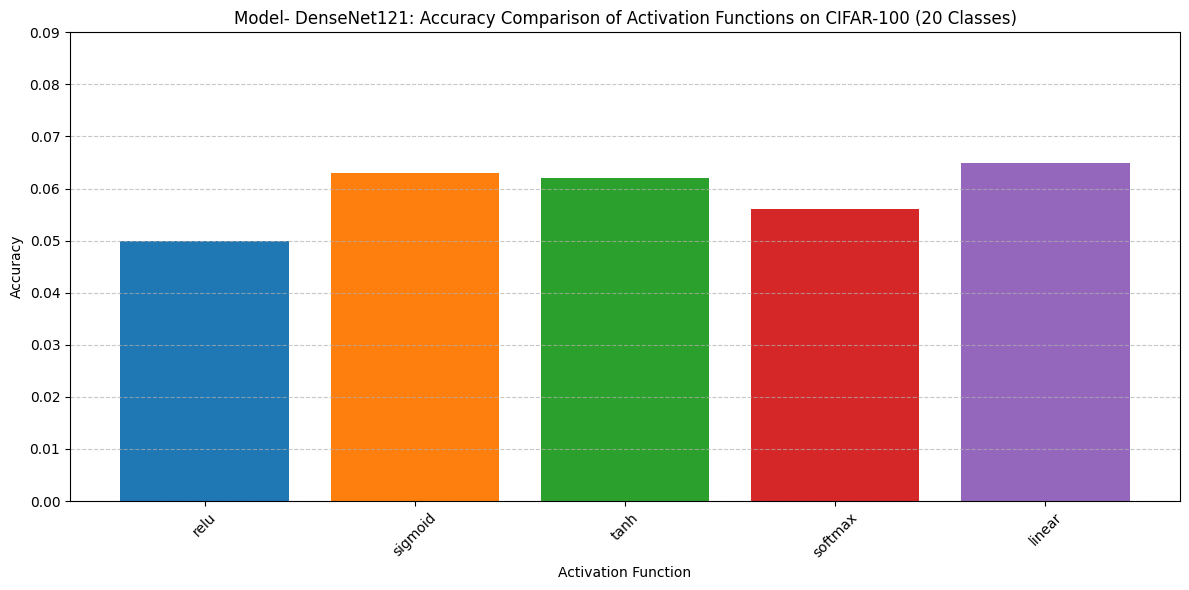

In [13]:
import matplotlib.pyplot as plt

# Accuracy results
activation_accuracies = {
    "relu": 0.0500,
    "sigmoid": 0.0630,
    "tanh": 0.0620,
    "softmax": 0.0560,
    "linear": 0.0650
}

# Data for plotting
activations = list(activation_accuracies.keys())
accuracies = list(activation_accuracies.values())
colors = plt.cm.tab10(range(len(activations)))  # Unique color for each bar

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(activations, accuracies, color=colors)
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.title('Model- DenseNet121: Accuracy Comparison of Activation Functions on CIFAR-100 (20 Classes)')
plt.xticks(rotation=45)
plt.ylim(0, 0.09)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Model: NasaNetMobile

In [16]:
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.applications.nasnet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
import random
import numpy as np
import tensorflow as tf

# Set seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Constants
IMG_SIZE = 224
NUM_CLASSES = 20

# Load and filter data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
y_train = y_train.flatten()
y_test = y_test.flatten()
selected_classes = random.sample(range(100), NUM_CLASSES)
class_map = {orig: new for new, orig in enumerate(selected_classes)}
test_mask = np.isin(y_test, selected_classes)
x_test, y_test = x_test[test_mask], y_test[test_mask]
y_test = np.vectorize(class_map.get)(y_test)
x_test = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE)).numpy()
x_test_processed = preprocess_input(x_test)

# Test activations
activations = ["relu", "sigmoid", "tanh", "softmax", "linear"]
results = {}

for activation in activations:
    base_model = NASNetMobile(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
    base_model.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation=activation)(x)
    output = Dense(NUM_CLASSES, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    y_pred_probs = model.predict(x_test_processed, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)
    acc = accuracy_score(y_test, y_pred)
    results[activation] = acc
    print(f"Activation: {activation:<10} -> Accuracy: {acc:.4f}")


19993432/19993432 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Activation: relu       -> Accuracy: 0.0480
Activation: sigmoid    -> Accuracy: 0.0530
Activation: tanh       -> Accuracy: 0.0590
Activation: softmax    -> Accuracy: 0.0510
Activation: linear     -> Accuracy: 0.0420


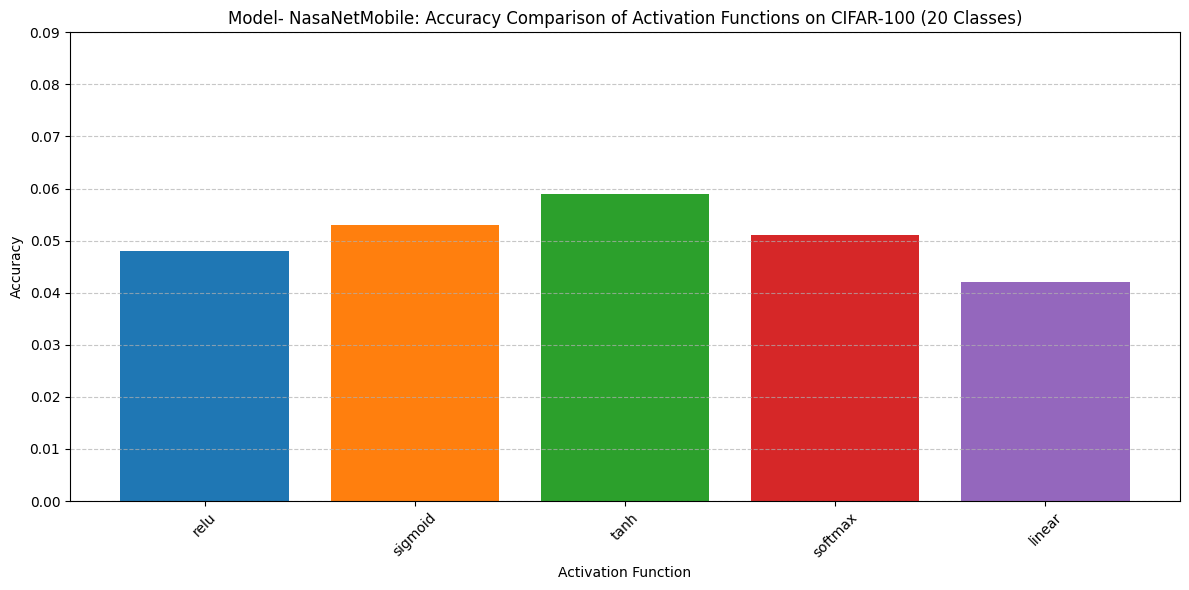

In [19]:
import matplotlib.pyplot as plt

# Accuracy results
activation_accuracies = {
    "relu": 0.0480,
    "sigmoid": 0.0530,
    "tanh": 0.0590,
    "softmax": 0.0510,
    "linear": 0.0420
}

# Data for plotting
activations = list(activation_accuracies.keys())
accuracies = list(activation_accuracies.values())
colors = plt.cm.tab10(range(len(activations)))  # Unique color for each bar

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(activations, accuracies, color=colors)
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.title('Model- NasaNetMobile: Accuracy Comparison of Activation Functions on CIFAR-100 (20 Classes)')
plt.xticks(rotation=45)
plt.ylim(0, 0.09)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Model : ResNet101

In [18]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
import random
import numpy as np
import tensorflow as tf

# Set seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Constants
IMG_SIZE = 224
NUM_CLASSES = 20

# Load and filter data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
y_train = y_train.flatten()
y_test = y_test.flatten()
selected_classes = random.sample(range(100), NUM_CLASSES)
class_map = {orig: new for new, orig in enumerate(selected_classes)}
test_mask = np.isin(y_test, selected_classes)
x_test, y_test = x_test[test_mask], y_test[test_mask]
y_test = np.vectorize(class_map.get)(y_test)
x_test = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE)).numpy()
x_test_processed = preprocess_input(x_test)

# Test activations
activations = ["relu", "sigmoid", "tanh", "softmax", "linear"]
results = {}

for activation in activations:
    base_model = ResNet101(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
    base_model.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation=activation)(x)
    output = Dense(NUM_CLASSES, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    y_pred_probs = model.predict(x_test_processed, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)
    acc = accuracy_score(y_test, y_pred)
    results[activation] = acc
    print(f"Activation: {activation:<10} -> Accuracy: {acc:.4f}")


171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Activation: relu       -> Accuracy: 0.0565
Activation: sigmoid    -> Accuracy: 0.0645
Activation: tanh       -> Accuracy: 0.0430
Activation: softmax    -> Accuracy: 0.0400
Activation: linear     -> Accuracy: 0.0325


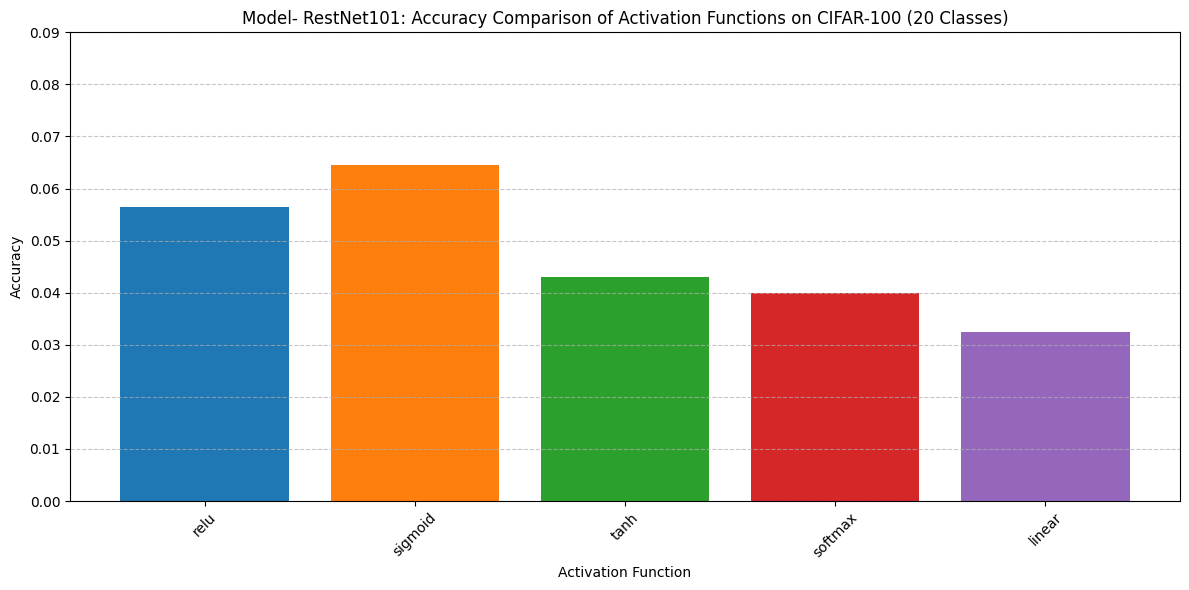

In [23]:
import matplotlib.pyplot as plt

# Accuracy results
activation_accuracies = {
    "relu": 0.0565,
    "sigmoid": 0.0645,
    "tanh": 0.0430,
    "softmax": 0.0400,
    "linear": 0.0325
}

# Data for plotting
activations = list(activation_accuracies.keys())
accuracies = list(activation_accuracies.values())
colors = plt.cm.tab10(range(len(activations)))  # Unique color for each bar

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(activations, accuracies, color=colors)
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.title('Model- RestNet101: Accuracy Comparison of Activation Functions on CIFAR-100 (20 Classes)')
plt.xticks(rotation=45)
plt.ylim(0, 0.09)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Model : Xception

In [21]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
import random
import numpy as np
import tensorflow as tf

# Set seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Constants
IMG_SIZE = 224
NUM_CLASSES = 20

# Load and filter data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
y_train = y_train.flatten()
y_test = y_test.flatten()
selected_classes = random.sample(range(100), NUM_CLASSES)
class_map = {orig: new for new, orig in enumerate(selected_classes)}
test_mask = np.isin(y_test, selected_classes)
x_test, y_test = x_test[test_mask], y_test[test_mask]
y_test = np.vectorize(class_map.get)(y_test)
x_test = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE)).numpy()
x_test_processed = preprocess_input(x_test)

# Test activations
activations = ["relu", "sigmoid", "tanh", "softmax", "linear"]
results = {}

for activation in activations:
    base_model = ResNet101(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
    base_model.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation=activation)(x)
    output = Dense(NUM_CLASSES, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    y_pred_probs = model.predict(x_test_processed, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)
    acc = accuracy_score(y_test, y_pred)
    results[activation] = acc
    print(f"Activation: {activation:<10} -> Accuracy: {acc:.4f}")


Activation: relu       -> Accuracy: 0.0565
Activation: sigmoid    -> Accuracy: 0.0645
Activation: tanh       -> Accuracy: 0.0430
Activation: softmax    -> Accuracy: 0.0400
Activation: linear     -> Accuracy: 0.0325


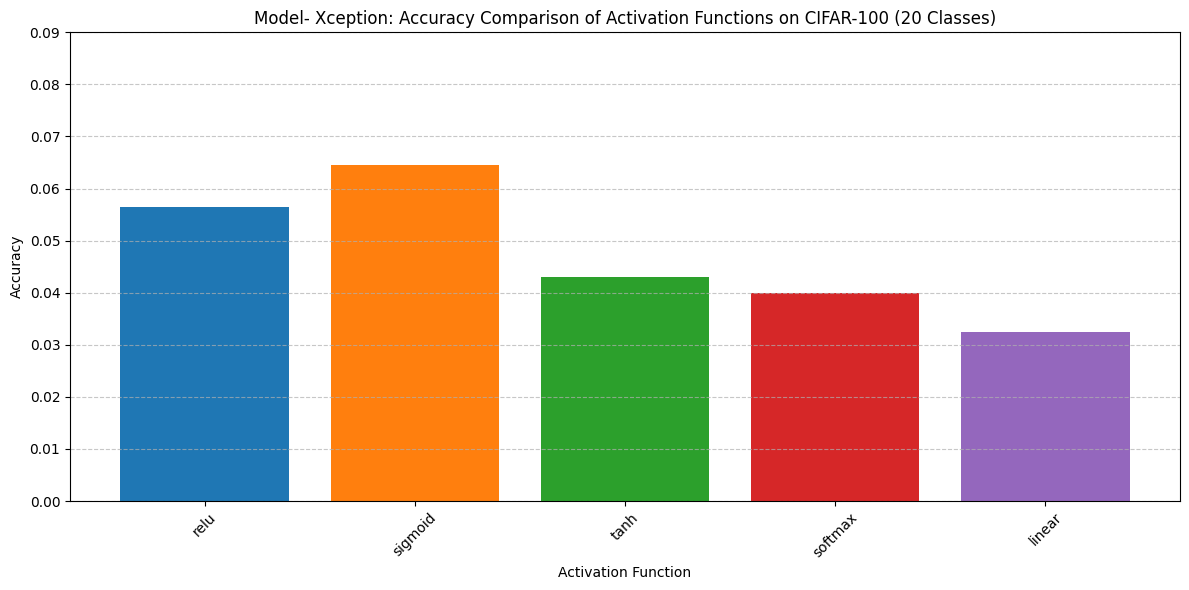

In [25]:
import matplotlib.pyplot as plt

# Accuracy results
activation_accuracies = {
    "relu": 0.0565,
    "sigmoid": 0.0645,
    "tanh": 0.0430,
    "softmax": 0.0400,
    "linear": 0.0325
}

# Data for plotting
activations = list(activation_accuracies.keys())
accuracies = list(activation_accuracies.values())
colors = plt.cm.tab10(range(len(activations)))  # Unique color for each bar

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(activations, accuracies, color=colors)
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.title('Model- Xception: Accuracy Comparison of Activation Functions on CIFAR-100 (20 Classes)')
plt.xticks(rotation=45)
plt.ylim(0, 0.09)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Model: InceptionV3

In [22]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
import random
import numpy as np
import tensorflow as tf

# Set seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Constants
IMG_SIZE = 224
NUM_CLASSES = 20

# Load and filter data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
y_train = y_train.flatten()
y_test = y_test.flatten()
selected_classes = random.sample(range(100), NUM_CLASSES)
class_map = {orig: new for new, orig in enumerate(selected_classes)}
test_mask = np.isin(y_test, selected_classes)
x_test, y_test = x_test[test_mask], y_test[test_mask]
y_test = np.vectorize(class_map.get)(y_test)
x_test = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE)).numpy()
x_test_processed = preprocess_input(x_test)

# Test activations
activations = ["relu", "sigmoid", "tanh", "softmax", "linear"]
results = {}

for activation in activations:
    base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
    base_model.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation=activation)(x)
    output = Dense(NUM_CLASSES, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    y_pred_probs = model.predict(x_test_processed, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)
    acc = accuracy_score(y_test, y_pred)
    results[activation] = acc
    print(f"Activation: {activation:<10} -> Accuracy: {acc:.4f}")


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Activation: relu       -> Accuracy: 0.0500
Activation: sigmoid    -> Accuracy: 0.0415
Activation: tanh       -> Accuracy: 0.0580
Activation: softmax    -> Accuracy: 0.0410
Activation: linear     -> Accuracy: 0.0555


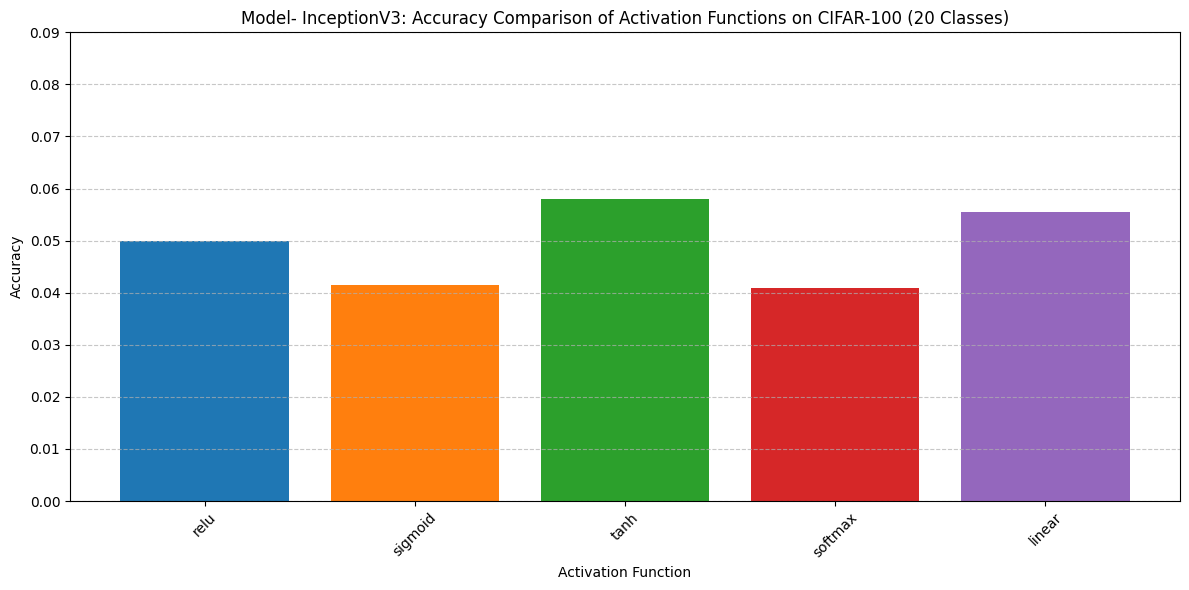

In [24]:
import matplotlib.pyplot as plt

# Accuracy results
activation_accuracies = {
    "relu": 0.0500,
    "sigmoid": 0.0415,
    "tanh": 0.0580,
    "softmax": 0.0410,
    "linear": 0.0555
}

# Data for plotting
activations = list(activation_accuracies.keys())
accuracies = list(activation_accuracies.values())
colors = plt.cm.tab10(range(len(activations)))  # Unique color for each bar

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(activations, accuracies, color=colors)
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.title('Model- InceptionV3: Accuracy Comparison of Activation Functions on CIFAR-100 (20 Classes)')
plt.xticks(rotation=45)
plt.ylim(0, 0.09)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Model :ConvNeXtBase

In [1]:
from tensorflow.keras.applications import ConvNeXtBase
from tensorflow.keras.applications.convnext import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
import random
import numpy as np
import tensorflow as tf

# Set seed for reproducibility
SEED = 42
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# Constants
IMG_SIZE = 224
NUM_CLASSES = 20

# Load and filter data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')
y_train = y_train.flatten()
y_test = y_test.flatten()
selected_classes = random.sample(range(100), NUM_CLASSES)
class_map = {orig: new for new, orig in enumerate(selected_classes)}
test_mask = np.isin(y_test, selected_classes)
x_test, y_test = x_test[test_mask], y_test[test_mask]
y_test = np.vectorize(class_map.get)(y_test)
x_test = tf.image.resize(x_test, (IMG_SIZE, IMG_SIZE)).numpy()
x_test_processed = preprocess_input(x_test)

# Test activations
activations = ["relu", "sigmoid", "tanh", "softmax", "linear"]
results = {}

for activation in activations:
    base_model = ConvNeXtBase(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))
    base_model.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation=activation)(x)
    output = Dense(NUM_CLASSES, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    y_pred_probs = model.predict(x_test_processed, verbose=0)
    y_pred = np.argmax(y_pred_probs, axis=1)
    acc = accuracy_score(y_test, y_pred)
    results[activation] = acc
    print(f"Activation: {activation:<10} -> Accuracy: {acc:.4f}")


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step
350926856/350926856 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step
Activation: relu       -> Accuracy: 0.0245
Activation: sigmoid    -> Accuracy: 0.0400
Activation: tanh       -> Accuracy: 0.0570
Activation: softmax    -> Accuracy: 0.0390
Activation: linear     -> Accuracy: 0.0525


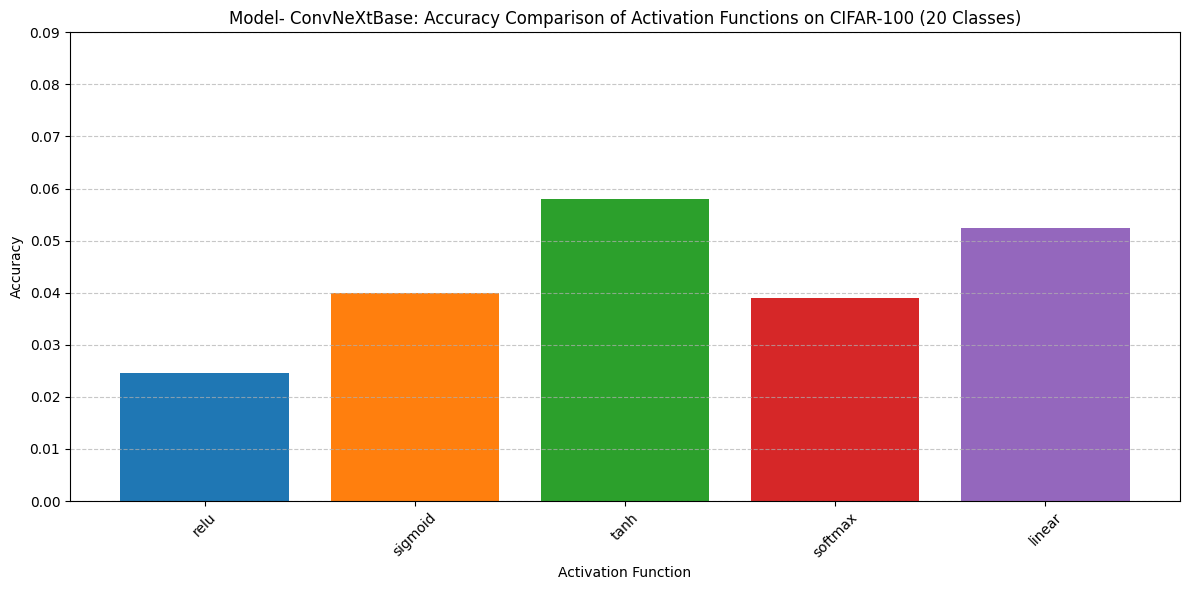

In [3]:
import matplotlib.pyplot as plt

# Accuracy results
activation_accuracies = {
    "relu": 0.0245,
    "sigmoid": 0.0400,
    "tanh": 0.0580,
    "softmax": 0.0390,
    "linear": 0.0525
}

# Data for plotting
activations = list(activation_accuracies.keys())
accuracies = list(activation_accuracies.values())
colors = plt.cm.tab10(range(len(activations)))  # Unique color for each bar

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(activations, accuracies, color=colors)
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.title('Model- ConvNeXtBase: Accuracy Comparison of Activation Functions on CIFAR-100 (20 Classes)')
plt.xticks(rotation=45)
plt.ylim(0, 0.09)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


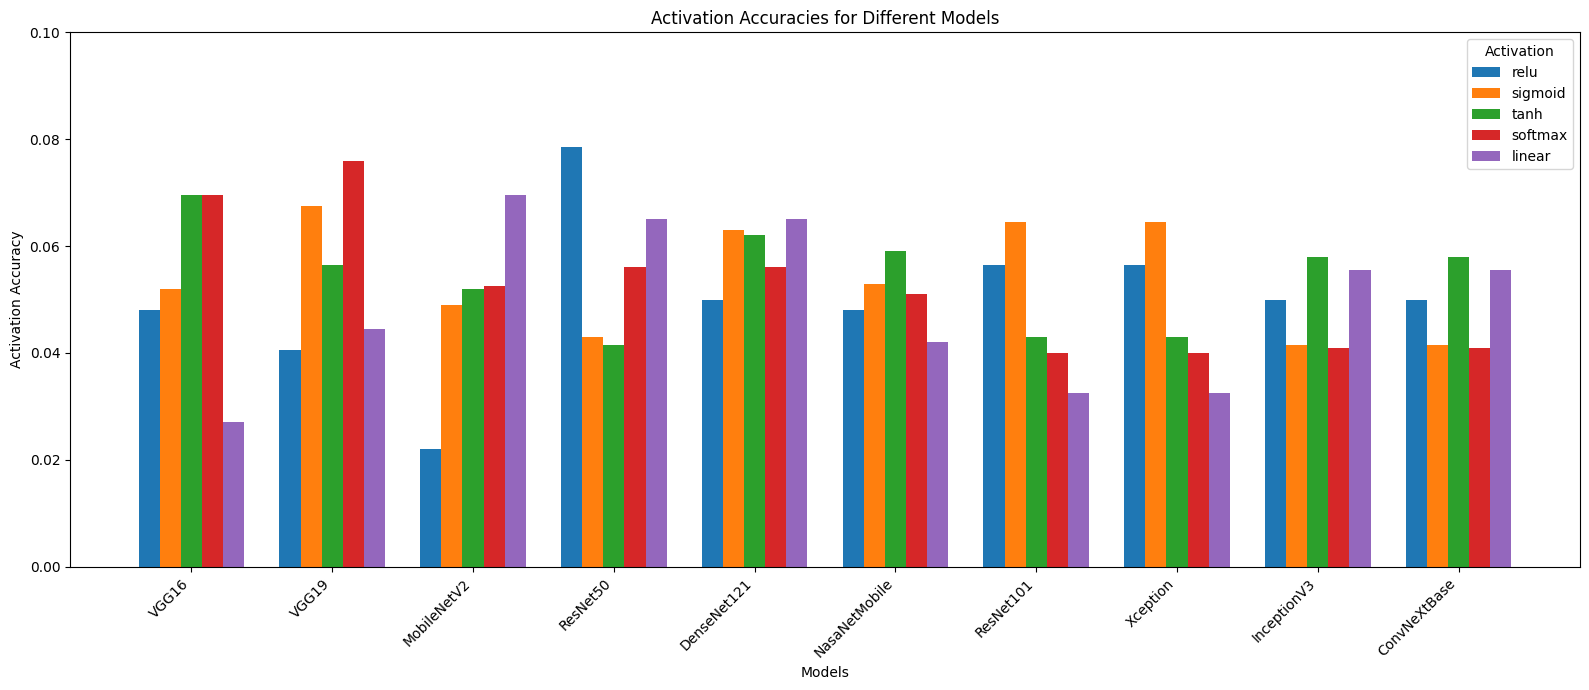

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = [
    "VGG16", "VGG19", "MobileNetV2", "ResNet50", "DenseNet121",
    "NasaNetMobile", "ResNet101", "Xception", "InceptionV3", "ConvNeXtBase"
]

# Activation types
activations = ["relu", "sigmoid", "tanh", "softmax", "linear"]

# Accuracies for each model corresponding to activations order
accuracies = [
    [0.0480, 0.0520, 0.0695, 0.0695, 0.0270],  # VGG16
    [0.0405, 0.0675, 0.0565, 0.0760, 0.0445],  # VGG19
    [0.0220, 0.0490, 0.0520, 0.0525, 0.0695],  # MobileNetV2
    [0.0785, 0.0430, 0.0415, 0.0560, 0.0650],  # ResNet50
    [0.0500, 0.0630, 0.0620, 0.0560, 0.0650],  # DenseNet121
    [0.0480, 0.0530, 0.0590, 0.0510, 0.0420],  # NasaNetMobile
    [0.0565, 0.0645, 0.0430, 0.0400, 0.0325],  # ResNet101
    [0.0565, 0.0645, 0.0430, 0.0400, 0.0325],  # Xception
    [0.0500, 0.0415, 0.0580, 0.0410, 0.0555],  # InceptionV3
    [0.0500, 0.0415, 0.0580, 0.0410, 0.0555]   # ConvNeXtBase
]

# Convert to numpy array for easier slicing
accuracies = np.array(accuracies)

# Bar chart settings
bar_width = 0.15
index = np.arange(len(models))

# Colors for each activation
colors = {
    "relu": "#1f77b4",
    "sigmoid": "#ff7f0e",
    "tanh": "#2ca02c",
    "softmax": "#d62728",
    "linear": "#9467bd"
}

plt.figure(figsize=(16, 7))

# Plot bars for each activation
for i, activation in enumerate(activations):
    plt.bar(index + i * bar_width, accuracies[:, i], bar_width, label=activation, color=colors[activation])

plt.xlabel('Models')
plt.ylabel('Activation Accuracy')
plt.title('Activation Accuracies for Different Models')
plt.xticks(index + bar_width * 2, models, rotation=45, ha="right")
plt.ylim(0, max(accuracies.max() + 0.02, 0.1))
plt.legend(title="Activation")
plt.tight_layout()
plt.show()
